# Simple Linear Regression

Predicting the Sales Values: <br>
- Given: the Budget and Sales of TV manufacturing company
- Task: to predict sales value for the unknown value of budget

In [2]:
import pandas as pd

In [12]:
advertising = pd.read_csv("tvmarketing.csv")

## 1. Understanding the Data

In [4]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
advertising.shape

(200, 2)

In [33]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## 2. Data Visualisation

In [26]:
import matplotlib.pyplot as plt

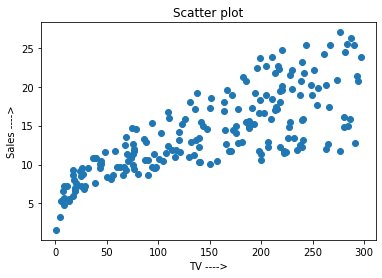

In [35]:
plt.scatter(advertising["TV"], advertising["Sales"])
plt.xlabel("TV ---->")
plt.ylabel("Sales ---->")
plt.title("Scatter plot")
plt.show()

## 3. Preparing Data for sklearn
- scikit-learn expects feature variable(x) and response variable(y) to be ndarray
- dataframes are ndarray only as pandas is built over numpy

In [39]:
X = advertising["TV"]
Y = advertising["Sales"]

In [40]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [41]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [45]:
X

195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, dtype: float64

## 4. Separating Training and Test Data

- NOTE: Pressing ```tab``` may autocomplete the function, pressing ```shift tab``` will show the documentation of function

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 100)

- ```model_selection``` was earlier ```cross_validation```
- ```train_size = 0.7``` means 70% of data is used as training data and 30% as test data
- ```random_state``` => selection of training and test data is random, if we want to select the exact same training and test data at later point of time we can do it by using value of random_state
- Above basiclly remembers what is training data and what is test data

In [55]:
print(type(X_train))
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [77]:
# verify the split - (70% of 200 = 140)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# not showing column in shape

(140,)
(140,)
(60,)
(60,)


In [58]:
X_train.head()
# the first column is s.no which is randomly selected

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [76]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [80]:
# for computation we need data in form of rows by column.
# Reshaping Data
import numpy as np

X_train = X_train[ :, np.newaxis]
X_test = X_test[ :, np.newaxis]

<ipython-input-80-6b439de3a6ee>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[ :, np.newaxis]
<ipython-input-80-6b439de3a6ee>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[ :, np.newaxis]


In [81]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## 5. Performing Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, Y_train) # the BFL is created.

LinearRegression()

### Coefficients Calculation
```y= mx + c``` => ```m```,```c``` are the coeff of best fit line

In [84]:
print(lr.intercept_)  # c
print(lr.coef_)  # m

6.989665857411681
[0.04649736]


$Sales = 0.0464 \times TV + 6.9896$

### Predictions

In [87]:
# Makinig predictions on test data
y_pred = lr.predict(X_test)


In [88]:
type(y_pred)

numpy.ndarray

# 6. Analysing the model

In [101]:
# Actual(Y_test) vs predicted(y_pred)
import matplotlib.pyplot as plt
c = [i for i in range(1,61)] #genereating index
print(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


### Testing against test data

Text(0, 0.5, 'Sales -->')

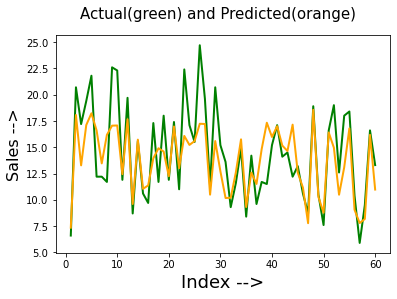

In [107]:
fig = plt.figure()
plt.plot(c,Y_test, color = "green", linewidth = 2, linestyle = "-")
plt.plot(c,y_pred, color = "orange", linewidth = 2, linestyle = "-")
fig.suptitle("Actual(green) and Predicted(orange)", fontsize = 15)
plt.xlabel("Index -->", fontsize = 18)
plt.ylabel("Sales -->", fontsize = 16) 

### Testing via Residual mean square error and R square values

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r_square = r2_score(Y_test, y_pred)


In [104]:
print("Mean Squared Error:", mse)
print("R_Square value:", r_square)

Mean Squared Error: 7.975798532854849
R_Square value: 0.5942987267783302


- RMSE value means only 7.9% of values of pred and test are not matching
- R2 value means model (BFL) is 59.42% accurate.
- R2 value > 50%  => decent model  

Text(0, 0.5, 'Predicted Data -->')

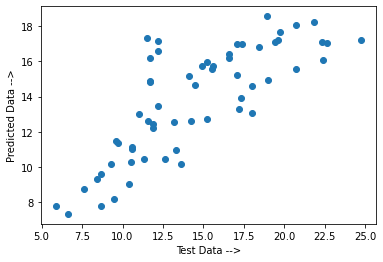

In [143]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Test Data -->")
plt.ylabel("Predicted Data -->")

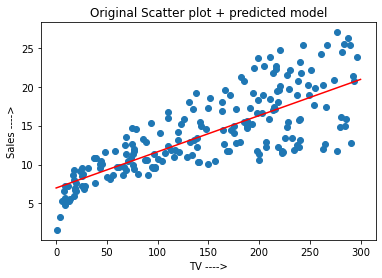

In [144]:
plt.scatter(advertising["TV"], advertising["Sales"])
plt.xlabel("TV ---->")
plt.ylabel("Sales ---->")
plt.title("Original Scatter plot + predicted model")

x1 = np.linspace(0,300)
plt.plot(x1,  lr.coef_*x1 + lr.intercept_, color = "red")

plt.show()

## TASK completed 
- calculated a Best fit (red line)
- now sales value for the previously unknown budget values can be predicted

# 7. Use the model

In [185]:
input_arr = []
n = int(input("Enter no. of budget values you want to predict:"))
for i in range(0,n):
    data = float(input("Enter value:"))
    input_arr.append(data)


Enter no. of budget values you want to predict:4
Enter value:120.5
Enter value:67.2
Enter value:99.9
Enter value:203.5


In [192]:
budget_val = np.array(input_arr) 
budget_val = budget_val[:,np.newaxis]  #reshaping
predict_sales = lr.predict(budget_val)
predict_sales

array([12.59259759, 10.11428837, 11.634752  , 16.45187836])